In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import time
import datetime
import warnings

warnings.filterwarnings('ignore')

In [2]:
#Import the data.....
tickersymbol = "reliance.NS"
data = yf.Ticker(tickersymbol)
data

yfinance.Ticker object <RELIANCE.NS>

In [3]:
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days = 730)
tomorrow = end_date + datetime.timedelta(days = 1)
prices = data.history(start = start_date, end = end_date).Close
prices

Date
2022-10-21 00:00:00+05:30    2265.566406
2022-10-24 00:00:00+05:30    2273.128906
2022-10-25 00:00:00+05:30    2238.021484
2022-10-27 00:00:00+05:30    2246.821289
2022-10-28 00:00:00+05:30    2315.569580
                                ...     
2024-10-14 00:00:00+05:30    2745.050049
2024-10-15 00:00:00+05:30    2688.050049
2024-10-16 00:00:00+05:30    2708.149902
2024-10-17 00:00:00+05:30    2712.850098
2024-10-18 00:00:00+05:30    2718.600098
Name: Close, Length: 491, dtype: float64

In [4]:
# Calculate returns
returns = prices.pct_change().dropna()   #Here we use dropna() because without dropna() we get first column "NaN"
returns

Date
2022-10-24 00:00:00+05:30    0.003338
2022-10-25 00:00:00+05:30   -0.015445
2022-10-27 00:00:00+05:30    0.003932
2022-10-28 00:00:00+05:30    0.030598
2022-10-31 00:00:00+05:30    0.009283
                               ...   
2024-10-14 00:00:00+05:30    0.000310
2024-10-15 00:00:00+05:30   -0.020765
2024-10-16 00:00:00+05:30    0.007477
2024-10-17 00:00:00+05:30    0.001736
2024-10-18 00:00:00+05:30    0.002120
Name: Close, Length: 490, dtype: float64

Text(0.5, 0, 'Date')

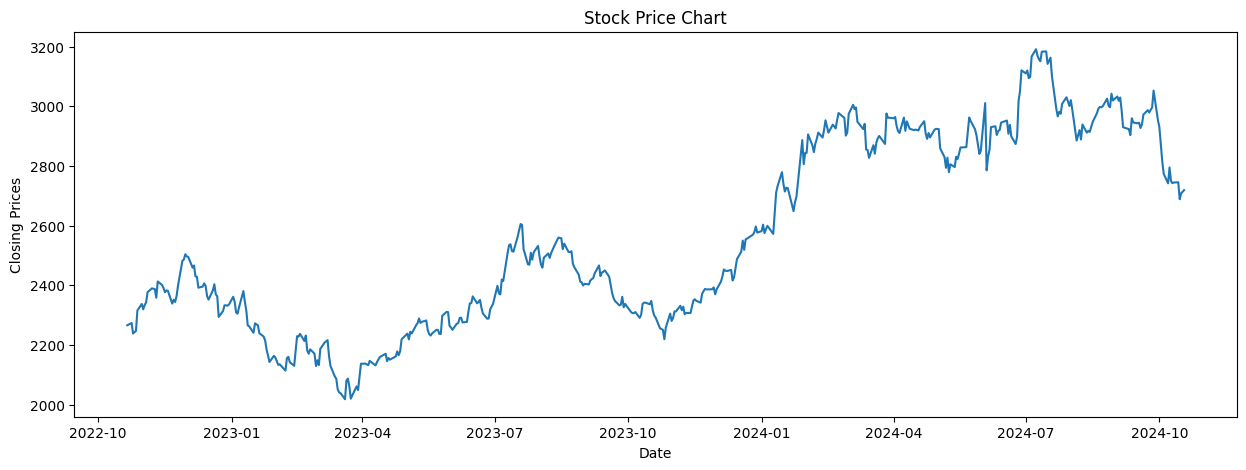

In [5]:
# Plot Stock Price...
plt.figure(figsize = (15,5))
plt.plot(prices)
plt.title("Stock Price Chart")
plt.ylabel("Closing Prices")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

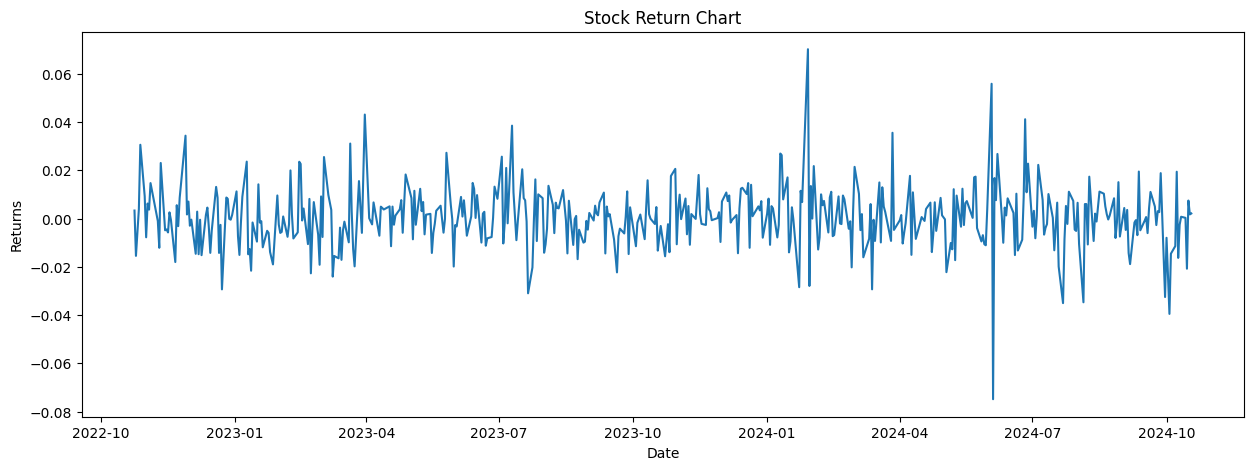

In [6]:
plt.figure(figsize = (15,5))
plt.plot(returns)
plt.title("Stock Return Chart")
plt.ylabel("Returns")
plt.xlabel("Date")

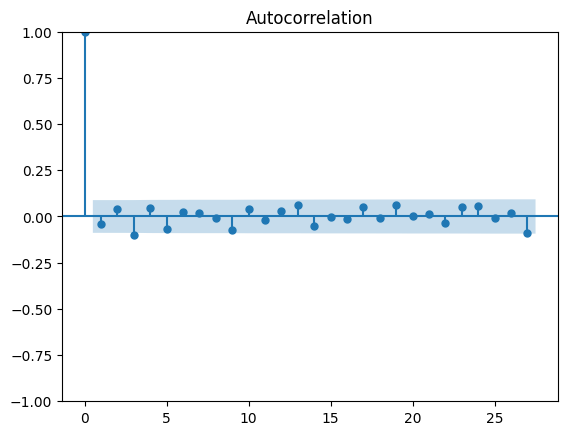

In [14]:
#Plot acf(AR) and pacf(MA)
plot_acf(returns)
plt.show()

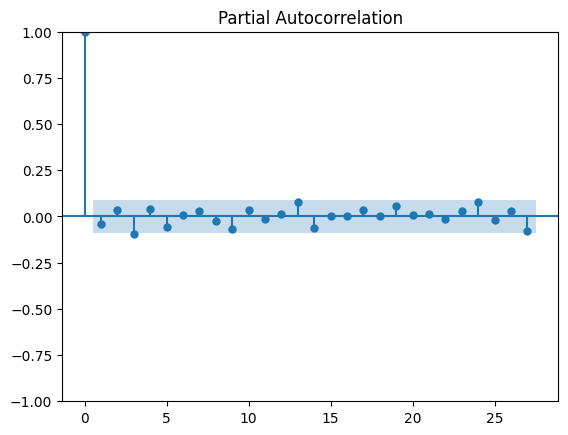

In [8]:
plot_pacf(returns, method = 'ywm')
plt.show()

In [24]:
# Building the model of ARIMA
model = ARIMA(prices, order = (4,2,4)) # here order represent (p,d,q)
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  491
Model:                 ARIMA(4, 2, 4)   Log Likelihood               -2409.427
Date:                Sun, 20 Oct 2024   AIC                           4836.854
Time:                        23:09:45   BIC                           4874.586
Sample:                             0   HQIC                          4851.674
                                - 491                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.1548      0.221     -9.747      0.000      -2.588      -1.721
ar.L2         -2.0590      0.318     -6.474      0.000      -2.682      -1.436
ar.L3         -0.8478      0.254     -3.342      0.0

In [33]:
#Prediction the next 100 days price......
next_100price = fitted.forecast(30, alpha = 0.05)
print(next_100price)

491    2718.993422
492    2724.014054
493    2717.449806
494    2726.487113
495    2721.939101
496    2724.274007
497    2726.743530
498    2725.971972
499    2726.329913
500    2730.682526
501    2726.847143
502    2731.533856
503    2731.308570
504    2730.986157
505    2733.917551
506    2734.040139
507    2733.691106
508    2737.384958
509    2735.657884
510    2737.740470
511    2739.357345
512    2738.652560
513    2740.782530
514    2741.907028
515    2741.338420
516    2744.129167
517    2743.965993
518    2744.705368
519    2746.766270
520    2746.561703
Name: predicted_mean, dtype: float64


In [34]:
next_day_price = next_100price.values[0]
next_day_price

2718.9934221653625

Text(0.5, 0, 'Date')

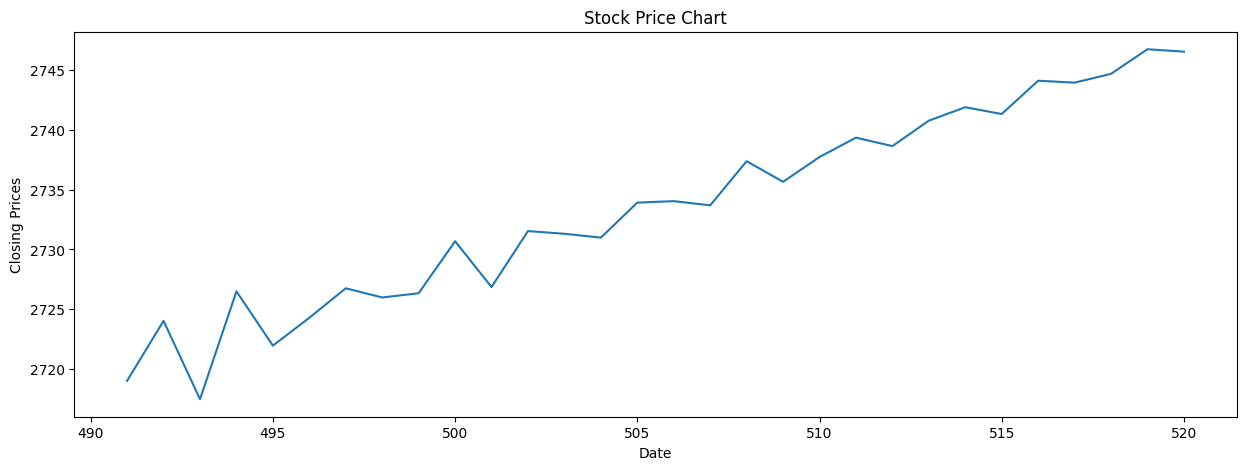

In [35]:
plt.figure(figsize = (15,5))
plt.plot(next_100price)
plt.title("Stock Price Chart")
plt.ylabel("Closing Prices")
plt.xlabel("Date")

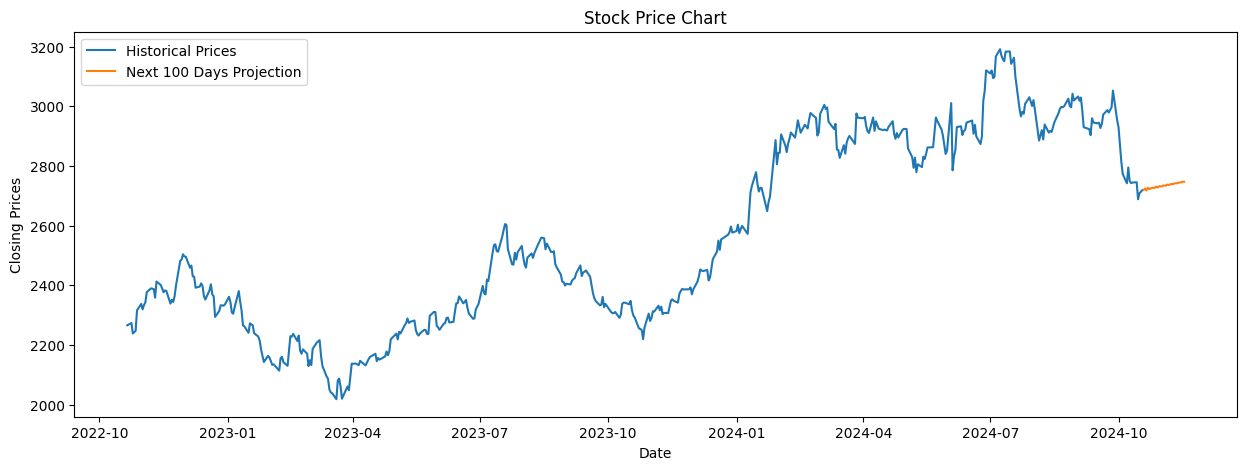

In [37]:
# Plot historical prices
plt.figure(figsize=(15, 5))
plt.plot(prices, label='Historical Prices')

# Assume next_100price is a continuation or prediction for 100 more days
#next_100price = np.linspace(prices[-1], prices[-1] * 1.05, 100)  # Simple example of a linear trend
future_dates = pd.date_range(prices.index[-1], periods=31, freq='D')[1:]  # Generating future dates

# Plot future predicted/extended prices
plt.plot(future_dates, next_100price, label='Next 100 Days Projection')

# Add labels and title
plt.title("Stock Price Chart")
plt.ylabel("Closing Prices")
plt.xlabel("Date")
plt.legend()

plt.show()
